# Cleaning and exporting Transactions dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [4]:
# Loading the Transactions dataset from the excel file

trans_df = pd.read_excel('Raw_data.xlsx', sheet_name='Transactions')

In [5]:
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

`The datatype of product_first_sold_date column is not in datetime format. The data type of this column must be changed from int64 to datetime format.`

## Total Records

In [7]:
print(f'Total Records in the dataset: {trans_df.shape[0]}')
print(f'Total features in the dataset: {trans_df.shape[1]}')

Total Records in the dataset: 20000
Total features in the dataset: 13


## Numeric Columns and Non-numeric Columns

In [8]:
# select numeric columns
df_num = trans_df.select_dtypes(include=[np.number])
print(f'Numeric Features: \n{df_num.columns.values}')

df_non_num = trans_df.select_dtypes(exclude=[np.number])
print(f'Non-numeric Features: \n{df_non_num.columns.values}')

Numeric Features: 
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
Non-numeric Features: 
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


## 1. Missing Values Check
Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [9]:
# Total number of unique customers in the dataset

trans_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
# Percentage of missing values in each column

trans_df.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

Here it is observed that columns like online_order, brand, product_line, product_class , product_size, standard_cost, product_first_sold_date have missing values.

## 1.1 Online Order
Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.

In [11]:
trans_df[trans_df['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


`Since most of the numbers are online order. We will do a mode imputation on this categorical value`

In [12]:
trans_df['online_order'].fillna(1, inplace=True)

In [13]:
trans_df['online_order'].isnull().sum()
# Thus no missing values in the online_order column

0

## 1.2 Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date
It is observed that when brand is null then all other column values with missing values viz. 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.

In [14]:
trans_df[trans_df['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'list_price', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,list_price,product_first_sold_date
136,NaN,NaN,NaN,NaN,1942.61,NaN
159,NaN,NaN,NaN,NaN,1656.86,NaN
366,NaN,NaN,NaN,NaN,850.89,NaN
406,NaN,NaN,NaN,NaN,710.59,NaN
676,NaN,NaN,NaN,NaN,1972.01,NaN
...,...,...,...,...,...,...
19340,NaN,NaN,NaN,NaN,744.54,NaN
19383,NaN,NaN,NaN,NaN,1098.18,NaN
19793,NaN,NaN,NaN,NaN,868.56,NaN
19859,NaN,NaN,NaN,NaN,1497.43,NaN


In [15]:
trans_df[trans_df['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'list_price', 'product_first_sold_date']].shape[0]

197

In [17]:
records_to_drop = trans_df[trans_df['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'list_price', 'product_first_sold_date']].index

records_to_drop

Int64Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,
             1282,
            ...
            19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859,
            19871],
           dtype='int64', length=197)

In [18]:
trans_df.drop(records_to_drop, inplace=True)

In [19]:
trans_df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

`Finally there are no missing values in the transaction dataset.`

In [20]:
print(f"Total {trans_df.shape[0]} records are left after dropping the records with missing values in the brand column")

Total 19803 records are left after dropping the records with missing values in the brand column


## 2. Feature Engineering a new feature "Profit"
`The Profit column will be the difference between the list price and the standard price of a product.`

In [21]:
trans_df['profit'] = trans_df['list_price'] - trans_df['standard_cost']

<Figure size 2000x2000 with 0 Axes>

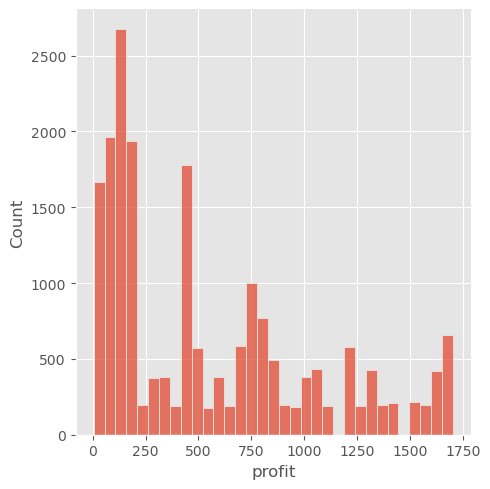

In [24]:
# Visualization of the profit made by each brand

plt.figure(figsize=(20, 20))
sns.displot(trans_df['profit'])

## 3. Inconsistency Check in Data
We will check whether there is inconsistency in the data/typo error data is present in the categorical columns
The columns to check are online_order, order_status, product_line, product_class, brand

### 3.1 Online Order
There is no inconsistency in the online_order column

In [25]:
trans_df['online_order'].value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

### 3.2 Order status
There are inconsistency

In [33]:
trans_df[['order_status', 'online_order']].value_counts()

order_status  online_order
Approved      1.0             9994
              0.0             9631
Cancelled     1.0              103
              0.0               75
dtype: int64

### 3.3 Product Line
There is no inconsistency

In [29]:
trans_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

### 3.4 Product Class
There is no inconsistency

In [30]:
trans_df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

### 3.5 Product Size
There is no inconsistency

In [31]:
trans_df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

### 3.6 Brand
There is no inconsistency

In [32]:
trans_df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

## 4. Duplication Checks
We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python

In [34]:
trans_dedupped = trans_df.drop('transaction_id', axis=1).drop_duplicates()

print(f'Number of records after removing duplicates: {trans_dedupped.shape[0]}')
print(f'Number of records in original dataframe: {trans_df.shape[0]}')

Number of records after removing duplicates: 19803
Number of records in original dataframe: 19803


`hence there are no duplicate records`

## 5. Exporting Cleaned Transactions Dataset to a csv file

In [35]:
trans_df.to_csv('Transactions_cleaned.csv', index=False)